# set up path

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
input_path = "/content/gdrive/MyDrive/SuperAI/ss3-hackathon-online-natural-language-processing/ne_sample_submission.csv"

In [ ]:
q_path = "/content/gdrive/MyDrive/SuperAI/ss3-hackathon-online-natural-language-processing/ne_test.txt"

In [ ]:
ner_list_path = "/content/gdrive/MyDrive/SuperAI/ss3-hackathon-online-natural-language-processing/ne_list.txt"

# simple sentence transformer

In [ ]:
texts_test_raw = []
f = open(q_path, "r")
file_data = f.readlines()
for line in file_data:
  line = line.strip().replace(u'\xa0', u'') # turn new line -> ''
  texts_test_raw.append(line)

In [ ]:
print(texts_test_raw)

In [ ]:
#remove last space
texts_test_raw = texts_test_raw[:-1]
len(texts_test_raw)

69561

In [ ]:
#Replace blank with "_"
def blank_space(x):
  if x == '':
    x = '_'
  return x

#Loop replace blank to "_"
for i in range(len(texts_test_raw)):
  texts_test_raw[i] = blank_space(texts_test_raw[i])

In [ ]:
print(texts_test_raw)

In [ ]:
def split_into_sentences(tokens, tokens_per_sentence=20):
    sentences = []
    for i in range(0, len(tokens), tokens_per_sentence):
        sentence = tokens[i:i+tokens_per_sentence]
        sentences.append(sentence)
    return sentences

In [ ]:
my_token = split_into_sentences(texts_test_raw)

In [ ]:
print(my_token) # to batch

[['นาง', 'สุดารัตน์', '_', 'เกยุราพันธ์', '_', 'รมว.', 'สาธารณสุข', '_', 'แถลง', 'ถึง', 'การ', 'จัด', 'งาน', 'มหกรรม', 'กิน', 'ไก่', 'ไทย', 'ปลอด', 'ภัย', '_'], ['100', '%', '_', 'ว่า', '_', 'รัฐบาล', 'ร่วม', 'กับ', 'กทม.', 'จัด', 'งาน', 'ดัง', 'กล่าว', 'ขึ้น', 'ที่', 'ท้องสนามหลวง', 'ใน', 'วัน', 'เสาร์', 'ที่'], ['_', '7', '_', 'ก.พ.', 'นี้', '_', 'ตั้งแต่', '_', '16.00', 'น.', 'เป็นต้นไป', '_', 'ส่วน', 'พ.ต.ท.', 'ทักษิณ', '_', 'ชินวัตร', 'รัฐมนตรี', '_', 'จะ'], ['เดินทาง', 'มา', 'ถึง', 'ที่', 'งาน', 'ใน', 'เวลา', '_', '16.30', 'น.', '_', 'เพื่อ', 'เยี่ยมชม', 'นิทรรศการ', '_', 'และ', 'ประกอบ', 'อาหาร', 'เมนู', '_'], ['กระเพรา', 'ไก่', 'ไข่ดาว', 'สุก', '_', 'ไก่', 'ทอด', '_', 'ด้วย', 'ตัว', 'เอง', 'และ', 'แจกจ่าย', 'ให้', 'กับ', 'ประชาชน', '_', 'โดย', 'จะ', 'มี'], ['นาย', 'สมัคร', '_', 'สุนทรเวช', '_', 'ผู้', 'ว่า', 'ฯ', 'กทม.', '_', 'และ', 'ม.ล.', 'ศิริเฉลิม', '_', 'สวัสดิวัฒน์', '_', 'หรือ', 'หมึกแดง', '_', 'ร่วม'], ['ปรุง', 'อาหาร', 'ด้วย', '_', 'ภาย', 'หลัง', 'ที่', 'นายก', 'ฯ', 'ป

In [ ]:
sent_join = ' '.join(my_token[0])
type(sent_join)

str

In [ ]:
sent_join # join to sentence with " "

'นาง สุดารัตน์ _ เกยุราพันธ์ _ รมว. สาธารณสุข _ แถลง ถึง การ จัด งาน มหกรรม กิน ไก่ ไทย ปลอด ภัย _'

In [ ]:
my_token_list = [] # turn element -> sentence
for i in range(len(my_token)):
  sent_join = ' '.join(my_token[i])
  print(sent_join)
  my_token_list.append(sent_join)

## pip zone

In [ ]:
!pip install -q simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 9.1 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 21.3 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.9 MB/s eta 0:00:00

  Preparing metadata (setup.py) ... done

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.6 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.8 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 54.1 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 24.0 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.5/258.5 kB 29.7 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.8 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.7 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 81.7 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0

In [ ]:
!pip install gdown

## load data ls20

In [ ]:
import pandas as pd
import json
from datasets import load_dataset
import gdown

In [ ]:
!tar -xvf "/content/gdrive/MyDrive/SuperAI/AIFORTHAI-LST20Corpus.tar.gz"

In [ ]:
#Load file in directory into variable lst20
lst20 = load_dataset("lst20", data_dir="/content/LST20_Corpus")
lst20

Generating train split:   0%|          | 0/63310 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5620 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5250 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 63310
    })
    validation: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5620
    })
    test: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5250
    })
})

In [ ]:
train_df = pd.DataFrame(lst20['train'])
validation_df = pd.DataFrame(lst20['validation'])
test_df = pd.DataFrame(lst20['test'])
train_df.head(3)

,id,fname,tokens,pos_tags,ner_tags,clause_tags
0,0,T00126.txt,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[0, 1, 1, 1, 2, 0, 2, 4, 0, 12, 1, 0]","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]"
1,1,T00126.txt,"[1, _, กันยายน, _, 2550, _, 12:21, _, น.]","[8, 2, 0, 2, 8, 2, 8, 2, 10]","[3, 13, 13, 13, 23, 0, 3, 13, 23]","[1, 2, 2, 2, 2, 2, 2, 2, 3]"
2,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ..."


In [ ]:
df_filter = ['id', 'tokens', 'ner_tags']
train_df = train_df[df_filter]
validation_df = validation_df[df_filter]
test_df = test_df[df_filter]
train_df.head(3)

,id,tokens,ner_tags
0,0,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]"
1,1,"[1, _, กันยายน, _, 2550, _, 12:21, _, น.]","[3, 13, 13, 13, 23, 0, 3, 13, 23]"
2,2,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ..."


In [ ]:
with open(ner_list_path, "r") as file:
    ner_list = file.read()
print(ner_list)

['B_BRN', 'B_DES', 'B_DTM', 'B_LOC', 'B_MEA', 'B_NUM', 'B_ORG', 'B_PER', 'B_TRM', 'B_TTL', 'E_BRN', 'E_DES', 'E_DTM', 'E_LOC', 'E_MEA', 'E_NUM', 'E_ORG', 'E_PER', 'E_TRM', 'E_TTL', 'I_BRN', 'I_DES', 'I_DTM', 'I_LOC', 'I_MEA', 'I_NUM', 'I_ORG', 'I_PER', 'I_TRM', 'I_TTL', 'O']






In [ ]:
# Sorting NER Tags start from O, B, I, and E
ner_list = [item.strip().strip(" '") for item in ner_list.strip("[]\n").split(",")]
O_list = [item for item in ner_list if item.startswith("O")]
B_list = [item for item in ner_list if item.startswith("B_")]
I_list = [item for item in ner_list if item.startswith("I_")]
E_list = [item for item in ner_list if item.startswith("E_")]
#Sort start from O,B_,I_,E_
NER_TAGS = O_list + B_list + I_list + E_list
print(NER_TAGS)

['O', 'B_BRN', 'B_DES', 'B_DTM', 'B_LOC', 'B_MEA', 'B_NUM', 'B_ORG', 'B_PER', 'B_TRM', 'B_TTL', 'I_BRN', 'I_DES', 'I_DTM', 'I_LOC', 'I_MEA', 'I_NUM', 'I_ORG', 'I_PER', 'I_TRM', 'I_TTL', 'E_BRN', 'E_DES', 'E_DTM', 'E_LOC', 'E_MEA', 'E_NUM', 'E_ORG', 'E_PER', 'E_TRM', 'E_TTL']


In [ ]:
# convert to simple transformer format
def convert_data_to_df(df):
  data_df = pd.DataFrame()
  sentence_id = []
  words = []
  labels = []

  for sentence in range(len(df)):
    for token in range(len(df['tokens'][sentence])):
      sentence_id.append(sentence)
      words.append(df['tokens'][sentence][token])
      labels.append(NER_TAGS[df['ner_tags'][sentence][token]]) #Map 0 to "O", 1 to "B_BRN"

  return pd.DataFrame(
      {"sentence_id": sentence_id, "words": words, "labels": labels}
  )

In [ ]:
train_df.head()

,id,tokens,ner_tags
0,0,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]"
1,1,"[1, _, กันยายน, _, 2550, _, 12:21, _, น.]","[3, 13, 13, 13, 23, 0, 3, 13, 23]"
2,2,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ..."
3,3,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,"[พร้อม, หนุน, กกต., จัด, เลือกตั้ง, ให้, บริสุ...","[0, 0, 7, 0, 0, 0, 0, 0]"


In [ ]:
# preprocess

In [ ]:
train_data = convert_data_to_df(train_df)
eval_data = convert_data_to_df(validation_df )
test_data = convert_data_to_df(test_df)

In [ ]:
train_data.head()

,sentence_id,words,labels
0,0,สุรยุทธ์,B_PER
1,0,ยัน,O
2,0,ปฏิเสธ,O
3,0,ลงนาม,O
4,0,_,O


In [ ]:
len(NER_TAGS)

31

In [ ]:
import logging
from simpletransformers.ner import NERModel, NERArgs
import torch

# Simple Transformer https://simpletransformers.ai/docs/ner-minimal-start/
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

In [ ]:
data = {
    'Model': ['ALBERT', 'BERT', 'BERTweet', 'BigBird', 'CamemBERT', 'DeBERTa', 'DeBERTa', 'DeBERTaV2', 'DistilBERT', 'ELECTRA', 'HerBERT', 'LayoutLM', 'LayoutLMv2', 'Longformer', 'MobileBERT', 'MPNet', 'RemBERT', 'RoBERTa', 'SqueezeBert', 'XLM', 'XLM-RoBERTa', 'XLNet'],
    'Model code for NERModel': ['albert', 'bert', 'bertweet', 'bigbird', 'camembert', 'deberta', 'deberta', 'deberta-v2', 'distilbert', 'electra', 'herbert', 'layoutlm', 'layoutlmv2', 'longformer', 'mobilebert', 'mpnet', 'rembert', 'roberta', 'squeezebert', 'xlm', 'xlmroberta', 'xlnet']
}
modelType_df = pd.DataFrame(data)
modelType_df

,Model,Model code for NERModel
0,ALBERT,albert
1,BERT,bert
2,BERTweet,bertweet
3,BigBird,bigbird
4,CamemBERT,camembert
5,DeBERTa,deberta
6,DeBERTa,deberta
7,DeBERTaV2,deberta-v2
8,DistilBERT,distilbert
9,ELECTRA,electra


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2714726 entries, 0 to 2714725

Data columns (total 3 columns):

 #   Column       Dtype 

---  ------       ----- 

 0   sentence_id  int64 

 1   words        object

 2   labels       object

dtypes: int64(1), object(2)

memory usage: 62.1+ MB


In [ ]:
max_seq_length = train_data['words'].str.len().max()
print("Maximum length in column 'words':", max_seq_length)

Maximum length in column 'words': 81


In [ ]:
# Configure the model
ner_args = NERArgs()
ner_args.train_batch_size = 128 #192 is fit for GPU T4, 512 for A100
ner_args.use_multiprocessing = True
ner_args.evaluate_during_training = True
ner_args.eval_batch_size = 1024
ner_args.num_train_epochs = 2
ner_args.overwrite_output_dir = True

model = NERModel(
     "roberta", # Model Type
     "xlm-roberta-base",  #Ner Pre-trained Model
     args=ner_args, use_cuda=torch.cuda.is_available(), labels=NER_TAGS # Local Config
)

In [ ]:
model.train_model(train_data, eval_data=eval_data)

In [ ]:
result, model_outputs, preds_list = model.eval_model(eval_data)
result

In [ ]:
!cp -r /content/outputs/best_model /content/gdrive/MyDrive/SuperAI/hack5/model

# finetune pythainlp with ls20

In [ ]:
!pip install pythainlp
!pip install transformers

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForTokenClassification
from pythainlp.tokenize import word_tokenize
import torch

In [ ]:
name="pythainlp/thainer-corpus-v2-base-model"
tokenizer = AutoTokenizer.from_pretrained(name)
model = AutoModelForTokenClassification.from_pretrained(name)

# sparknlp tokenize+ner


In [ ]:
! pip install -q pyspark==3.3.0 spark-nlp==4.2.8
! pip install --upgrade -q spark-nlp-display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 3.0 MB/s eta 0:00:00

  Preparing metadata (setup.py) ... done

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.8/453.8 kB 42.3 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 24.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 3.3 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.9/66.9 kB 9.1 MB/s eta 0:00:00

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.6 MB/s eta 0:00:00



In [ ]:
import json
import pandas as pd
import numpy as np

import sparknlp
import pyspark.sql.functions as F

from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
from sparknlp.annotator import *
from sparknlp.base import *
from sparknlp.pretrained import PretrainedPipeline
from pyspark.sql.types import StringType, IntegerType

In [ ]:
spark = sparknlp.start()

print("Spark NLP version", sparknlp.version())
print("Apache Spark version:", spark.version)

spark

Spark NLP version 4.2.8

Apache Spark version: 3.3.0


In [ ]:
document_assembler = DocumentAssembler() \
    .setInputCol("text") \
    .setOutputCol("document")

sentence_detector = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")

word_segmenter = WordSegmenterModel.pretrained("wordseg_best", "th")\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

embeddings = WordEmbeddingsModel.pretrained("glove_840B_300", "xx")\
    .setInputCols("document", "token") \
    .setOutputCol("embeddings")

ner = NerDLModel.pretrained("ner_lst20_glove_840B_300d", "th") \
    .setInputCols(["document", "token", "embeddings"]) \
    .setOutputCol("ner")

wordseg_best download started this may take some time.

Approximate size to download 79.2 KB

[OK!]

glove_840B_300 download started this may take some time.

Approximate size to download 2.3 GB

[OK!]

ner_lst20_glove_840B_300d download started this may take some time.

Approximate size to download 22.8 MB

[OK!]


In [ ]:
pipeline = Pipeline(stages=[document_assembler, sentence_detector, word_segmenter, embeddings, ner, ner_converter])
example = spark.createDataFrame([['ผมคิดว่าเป็นปลายเหตุที่แทกซี่ไม่ยอมกดมิเตอร์ จริงๆต้องเห็นใจเขาเหมือนกัน หากกดมิเตอร์ไปแล้ว ในช่วงที่รถติดจริงๆ มิเตอร์ไม่ขึ้น เขาก็ไม่ได้ตัง']], ["text"])
result = pipeline.fit(example).transform(example)

In [ ]:
result.collect()[0]

In [ ]:
from sparknlp_display import NerVisualizer

NerVisualizer().display(
    result = result.collect()[0],
    label_col = 'ner_chunk',
    document_col = 'document'
)

# wangchanberta

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install -q simpletransformers

In [ ]:
!tar -xvf "/content/AIFORTHAI-LST20Corpus.tar.gz"

In [3]:
import pandas as pd
import json
from datasets import load_dataset
import gdown
from sklearn.metrics import f1_score

In [33]:
from datasets import load_dataset
lst20 = load_dataset("lst20", data_dir="/content/gdrive/MyDrive/SuperAI/LST20_Corpus")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for lst20 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/lst20

You can avoid this message in future by passing the argument `trust_remote_code=True`.

Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.

  warnings.warn(


Generating train split:   0%|          | 0/63310 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5620 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5250 [00:00<?, ? examples/s]

In [4]:
lst20

DatasetDict({
    train: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 63310
    })
    validation: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5620
    })
    test: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5250
    })
})

In [34]:
import pandas as pd
train_df = pd.DataFrame(lst20['train'])
validation_df = pd.DataFrame(lst20['validation'])
test_df = pd.DataFrame(lst20['test'])

In [ ]:
#train_ = pd.concat([train_df, validation_df] ,ignore_index = True)

In [35]:
train_df

,id,fname,tokens,pos_tags,ner_tags,clause_tags
0,0,T00126.txt,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[0, 1, 1, 1, 2, 0, 2, 4, 0, 12, 1, 0]","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]"
1,1,T00126.txt,"[1, _, กันยายน, _, 2550, _, 12:21, _, น.]","[8, 2, 0, 2, 8, 2, 8, 2, 10]","[3, 13, 13, 13, 23, 0, 3, 13, 23]","[1, 2, 2, 2, 2, 2, 2, 2, 3]"
2,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ..."
3,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
4,4,T00126.txt,"[พร้อม, หนุน, กกต., จัด, เลือกตั้ง, ให้, บริสุ...","[3, 1, 0, 1, 1, 3, 1, 1]","[0, 0, 7, 0, 0, 0, 0, 0]","[1, 2, 2, 2, 3, 1, 2, 3]"
...,...,...,...,...,...,...
63305,6,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, หาก, การ, ยื่น...","[0, 0, 2, 1, 3, 2, 3, 7, 1, 0, 12, 1, 3, 5, 1,...","[10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63306,7,T13136.txt,"[เมื่อ, ถาม, ว่า, _, ใน, ทาง, การเมือง, _, หาก...","[4, 1, 3, 2, 4, 0, 0, 2, 3, 0, 3, 1, 0, 6, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63307,8,T13136.txt,"[นาย, ปณิธาน, _, กล่าว, ว่า, _, เรื่อง, กฎหมาย...","[0, 0, 2, 1, 3, 2, 0, 0, 5, 3, 1, 2, 7, 1, 1, ...","[10, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
63308,9,T13136.txt,"[หาก, เป็น, การ, ขอ, ถวาย, ฎีกา, ตาม, โบราณ, ร...","[3, 1, 7, 1, 1, 0, 4, 0, 0, 2, 5, 1, 0, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, ..."


In [14]:
_POS_TAGS = ["NN", "VV", "PU", "CC", "PS", "AX", "AV", "FX", "NU", "AJ", "CL", "PR", "NG", "PA", "XX", "IJ"]
_NER_TAGS = [
        "O",
        "B_BRN",
        "B_DES",
        "B_DTM",
        "B_LOC",
        "B_MEA",
        "B_NUM",
        "B_ORG",
        "B_PER",
        "B_TRM",
        "B_TTL",
        "I_BRN",
        "I_DES",
        "I_DTM",
        "I_LOC",
        "I_MEA",
        "I_NUM",
        "I_ORG",
        "I_PER",
        "I_TRM",
        "I_TTL",
        "E_BRN",
        "E_DES",
        "E_DTM",
        "E_LOC",
        "E_MEA",
        "E_NUM",
        "E_ORG",
        "E_PER",
        "E_TRM",
        "E_TTL",
    ]
_CLAUSE_TAGS = ["O", "B_CLS", "I_CLS", "E_CLS"]

In [ ]:
target = 'กระต่าย'

for i in range(len(train_df)):
  if(target in train_df.loc[i, "tokens"]):
    print(train_df.iloc[i])

In [8]:
row = 1
sample_show = pd.DataFrame({"token":train_df.loc[row, "tokens"],
                            "ner":[_NER_TAGS[i] for i in train_df["ner_tags"][row]]})
sample_show

,token,ner
0,1,B_DTM
1,_,I_DTM
2,กันยายน,I_DTM
3,_,I_DTM
4,2550,E_DTM
5,_,O
6,12:21,B_DTM
7,_,I_DTM
8,น.,E_DTM


In [36]:
def convert_to_simple_transformer_format(df, field_name, tags):
  sentence_id = []
  words = []
  labels = []

  #Limit at 1000 rows for speed.
  for (idx, r) in df[:20000].iterrows():
    # print(idx)
    for (i, t) in enumerate(r['tokens']):
      # print(i,t)
      sentence_id.append(idx)
      words.append(t)
      labels.append(tags[r[field_name][i]])

  return pd.DataFrame(
      {"sentence_id": sentence_id, "words": words, "labels": labels}
  )


In [37]:
train_ = convert_to_simple_transformer_format(train_df, "ner_tags", _NER_TAGS)
validation_ = convert_to_simple_transformer_format(validation_df, "ner_tags", _NER_TAGS)
test_ = convert_to_simple_transformer_format(test_df, "ner_tags", _NER_TAGS)

In [86]:
train_

,sentence_id,words,labels
0,0,สุรยุทธ์,B_PER
1,0,ยัน,O
2,0,ปฏิเสธ,O
3,0,ลงนาม,O
4,0,_,O
...,...,...,...
2714721,63309,การ,O
2714722,63309,ถอน,O
2714723,63309,รายชื่อ,O
2714724,63309,ด้วย,O


In [4]:
import torch
import pandas as pd
from simpletransformers.ner import NERModel, NERArgs

In [38]:
# Configure the model
ner_args = NERArgs()
ner_args.train_batch_size = 256
ner_args.use_multiprocessing = True
ner_args.evaluate_during_training = True
ner_args.eval_batch_size = 256
ner_args.num_train_epochs = 12
ner_args.overwrite_output_dir = True
ner_args.gradient_accumulation_steps = 4
ner_args.max_seq_length = 81

#ner_args.learning_rate = 2e-4
#optimizer = Adafactor(model.parameters(), scale_parameter=False, relative_step=True, warmup_init=True, lr=None)
#ner_args.optimizer = (Adafactor(model.parameters(), scale_parameter=False, relative_step=True, warmup_init=True, lr=None))
#ner_args.max_seq_length = 128

In [ ]:
model = NERModel(
    "camembert", "airesearch/wangchanberta-base-att-spm-uncased", args=ner_args, use_cuda=torch.cuda.is_available(), labels=_NER_TAGS
)

# Train the model
model.train_model(train_, eval_data=test_, show_running_loss=True)

In [40]:
!cp -r /content/outputs/best_model /content/gdrive/MyDrive/SuperAI/hack5/model

## load model

In [ ]:
ner_args = NERArgs()
ner_args.eval_batch_size = 128
ner_args.use_multiprocessing = True
test_ner = NERModel("auto", '/content/gdrive/MyDrive/SuperAI/hack5/model/best_model', args=ner_args
                    , use_cuda=torch.cuda.is_available(), labels= _NER_TAGS)

In [ ]:
predictions, raw_outputs = test_ner.predict(["นาง สุดารัตน์ _ เกยุราพันธ์ _ รมว. สาธารณสุข _ แถลง ถึง การ จัด งาน มหกรรม กิน ไก่ ไทย ปลอด ภัย _"])
predictions

  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

[[{'นาง': 'B_TTL'},
  {'สุดารัตน์': 'B_PER'},
  {'_': 'I_PER'},
  {'เกยุราพันธ์': 'E_PER'},
  {'_': 'O'},
  {'รมว.': 'B_DES'},
  {'สาธารณสุข': 'B_ORG'},
  {'_': 'O'},
  {'แถลง': 'O'},
  {'ถึง': 'O'},
  {'การ': 'O'},
  {'จัด': 'O'},
  {'งาน': 'O'},
  {'มหกรรม': 'O'},
  {'กิน': 'O'},
  {'ไก่': 'O'},
  {'ไทย': 'B_LOC'},
  {'ปลอด': 'O'},
  {'ภัย': 'O'},
  {'_': 'O'}]]

In [ ]:
!cp -r /content/outputs/best_model /content/gdrive/MyDrive/hack5/model

## make submission

In [106]:
import pandas as pd

test_data = pd.read_csv("/content/gdrive/MyDrive/SuperAI/hack5/nithan-chadok-name-entity-recognition/test.csv")

In [196]:
texts_test_raw = []
for i in range(len(test_data)):
  texts_test_raw.append(test_data.loc[i, "word"])

In [197]:
def blank_space(x):
  if x == '':
    x = '_'
  return x

#Loop replace blank to "_"
for i in range(len(texts_test_raw)):
  texts_test_raw[i] = blank_space(texts_test_raw[i])

In [195]:
def split_into_sentences(tokens, tokens_per_sentence=53):
    sentences = []
    for i in range(0, len(tokens), tokens_per_sentence):
        sentence = tokens[i:i+tokens_per_sentence]
        sentences.append(sentence)
    return sentences

In [198]:
def check_inside(my_token):
  counter = 0
  for i in range(len(my_token)):
    counter+=len(my_token[i])
  return counter

In [199]:
my_token = split_into_sentences(texts_test_raw)

In [200]:
sent_join = ' '.join(my_token[0])
type(sent_join)

str

In [201]:
my_token_list = []
for i in range(len(my_token)):
  sent_join = ' '.join(my_token[i])
  #print(sent_join)
  my_token_list.append(sent_join)

In [202]:
# Test Model
ner_args = NERArgs()
ner_args.eval_batch_size = 128
ner_args.use_multiprocessing = True
model = NERModel(
     "camembert", "/content/gdrive/MyDrive/SuperAI/hack5/model/best_model_wangchanberta_addarg", args=ner_args, use_cuda=torch.cuda.is_available(), labels=_NER_TAGS  # your latest model
)

/usr/local/lib/python3.10/dist-packages/simpletransformers/ner/ner_model.py:433: UserWarning: use_multiprocessing automatically disabled as CamemBERT fails when using multiprocessing for feature conversion.

  warnings.warn(


In [203]:
predictions, raw_outputs = model.predict(my_token, False)

  0%|          | 0/1227 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/10 [00:00<?, ?it/s]

In [204]:
test_tag = pd.read_csv("/content/gdrive/MyDrive/SuperAI/hack5/nithan-chadok-name-entity-recognition/tag_list.csv")

In [ ]:
test_tag

In [170]:
test_tag.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 32 entries, 0 to 31

Data columns (total 2 columns):

 #   Column  Non-Null Count  Dtype 

---  ------  --------------  ----- 

 0   tag     32 non-null     object

 1   class   32 non-null     int64 

dtypes: int64(1), object(1)

memory usage: 640.0+ bytes


In [205]:
tag2class = {}
for i in range(len(test_tag)):
  tag2class[test_tag.loc[i, "tag"]] = test_tag.loc[i, "class"]

In [206]:
#Extract data value from dict list
final_test_df = []
for i in range(len(predictions)):
  for j in range(len(predictions[i])):
    data = predictions[i][j]
    #print(data, type(data))
    value = data.values()
    final_test_df += value

In [207]:
final_result = pd.DataFrame(final_test_df, columns=["id"])
final_result

,id
0,O
1,O
2,O
3,O
4,O
...,...
65000,O
65001,O
65002,O
65003,O


In [208]:
for i in range(len(final_result)):
  final_result.loc[i,"pred"] = str(tag2class[final_result.loc[i, "id"]])

In [209]:
import numpy as np
x = final_result["pred"].unique()
print(len(x))
print(x)

18

['0' '3' '12' '14' '2' '9' '18' '4' '10' '15' '17' '1' '13' '5' '16' '7'

 '8' '6']


In [210]:
final_result

,id,pred
0,O,0
1,O,0
2,O,0
3,O,0
4,O,0
...,...,...
65000,O,0
65001,O,0
65002,O,0
65003,O,0


In [211]:
submission = pd.read_csv("/content/gdrive/MyDrive/SuperAI/hack5/nithan-chadok-name-entity-recognition/sample_submission.csv")

In [212]:
test_df = pd.read_csv("/content/gdrive/MyDrive/SuperAI/hack5/nithan-chadok-name-entity-recognition/test.csv")

In [213]:
test_df

,i,word
0,0,ใน
1,1,สมัย
2,2,หนึ่ง
3,3,_
4,4,พระพุทธเจ้า
...,...,...
65002,65002,ผู้
65003,65003,สำรวม
65004,65004,ดี
65005,65005,แล้ว


In [ ]:
for i in range(len(test_df)):
  target = test_df.loc[i, "word"]

  #animal
  ani = "นกมูลไถ,พังพอน,ลิง,หงส์,นกแขกเต้า,เต่า,กวาง,จระเข้,นกหัวขวาน,กบเขียว,ปูทอง,ปู,นกต้อย,นกดุเหว่า,ปลา,นกเค้า,นก,ช้าง,กระต่าย,นาก,เหยี่ยว,หงส์ทอง,หมูป่า,แรด"
  ani_ls = ani.split(',')
  if(target in ani_ls):
    final_result.loc[i, "pred"] = "0"
  #นายพราน
  if("นายพราน" in target):
    final_result.loc[i, "pred"] = "0"
  #prefix
  if(target in ["ท้าว", "พญา", "ท่าน", "พระ"]):
    final_result.loc[i, "pred"] = "9"
  #prefix sth
  if(target in ["ท้าว", "เจ้า"]):
    final_result.loc[i, "pred"] = "11"
  #มีแต่่ 12
  if(final_result.loc[i, "pred"] == "12"):
    final_result.loc[i-1, "pred"] = "3"
  #"_" + สรรพนามแทนตัวเอง
  if(target in ["_", "เรา", "ข้าพเจ้า"]):
    final_result.loc[i, "pred"] = "0"
  # ที่ + order number
  if (target == "ที่") and str(test_df.loc[i+2, "word"]).isdigit() :
    final_result.loc[i, "pred"] = "4"
  # pair of 4 and 17
  if(final_result.loc[i, "pred"]=="4") and (final_result.loc[i+2, "pred"]=="17"):
    final_result.loc[i+1, "pred"] = "15"

In [214]:
submission["pred"] = final_result["pred"]

In [215]:
submission

,i,pred
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
65002,65002,0
65003,65003,0
65004,65004,0
65005,65005,NaN


In [216]:
submission = submission[['i','pred']]
submission = submission.set_index('i')
submission.head()

,pred
i,
0,0
1,0
2,0
3,0
4,0


In [217]:
submission.to_csv("submission_wangchanberta-53-luckies.csv")

In [ ]:
final_result.to_csv('/content/myresult.csv',index=False)

In [ ]:
submisstion_df = pd.read_csv('/content/gdrive/MyDrive/SuperAI/ss3-hackathon-online-natural-language-processing/ne_sample_submission.csv')
submisstion_df

,Id,Predicted
0,1,B_TTL
1,2,B_PER
2,3,I_PER
3,4,NaN
4,5,NaN
...,...,...
69556,69557,NaN
69557,69558,NaN
69558,69559,NaN
69559,69560,NaN


In [ ]:
submisstion_df['token'] = pd.DataFrame({'Token': texts_test_raw})
submisstion_df['Predicted'] = final_result
submisstion_df.head(20)

,Id,Predicted,token
0,1,B_TTL,นาง
1,2,B_PER,สุดารัตน์
2,3,I_PER,_
3,4,E_PER,เกยุราพันธ์
4,5,O,_
5,6,B_DES,รมว.
6,7,B_ORG,สาธารณสุข
7,8,O,_
8,9,O,แถลง
9,10,O,ถึง


In [ ]:
submission_df = submisstion_df[['Id','Predicted']]
submission_df = submission_df.set_index('Id')
submission_df.head()

,Predicted
Id,
1,B_TTL
2,B_PER
3,I_PER
4,E_PER
5,O


In [ ]:
submission_df.to_csv("submission_wangchanberta.csv")

# LSTM + crf
ไม่เวิร์คจ้า

## pip zone

In [ ]:
! pip install transformers
! pip install datasets
! pip install pythainlp
! pip install python-crfsuite
! pip install sentencepiece
! pip install keras-crf
! pip install git+https://www.github.com/keras-team/keras-contrib.git
! pip install tf2crf
! pip install keras
! pip install seqeval
! pip install sklearn_crfsuite
! pip install pyyaml h5py

In [2]:
import numpy as np
import pandas as pd
import datasets
import re
import matplotlib.pyplot as plt
import tensorflow as tf

## load + preprocess

In [3]:
ner_tag = [
        "O",
        "B_BRN",
        "B_DES",
        "B_DTM",
        "B_LOC",
        "B_MEA",
        "B_NUM",
        "B_ORG",
        "B_PER",
        "B_TRM",
        "B_TTL",
        "I_BRN",
        "I_DES",
        "I_DTM",
        "I_LOC",
        "I_MEA",
        "I_NUM",
        "I_ORG",
        "I_PER",
        "I_TRM",
        "I_TTL",
        "E_BRN",
        "E_DES",
        "E_DTM",
        "E_LOC",
        "E_MEA",
        "E_NUM",
        "E_ORG",
        "E_PER",
        "E_TRM",
        "E_TTL",
    ]

In [4]:
len(ner_tag)

31

In [5]:
id_to_ner = {}
for i in range(len(ner_tag)):
    id_to_ner[i] = ner_tag[i]


ner_to_id = {}
for i in range(len(ner_tag)):
    ner_to_id[ner_tag[i]] = i


In [6]:
def idx_to_ner(idx, id_to_ner):
    ret = []
    for i in idx:
        ret.append(id_to_ner[i])
    return ret

In [7]:
def ner_to_idx(ner, ner_to_id):
    ret = []
    for i in ner:
        ret.append(ner_to_id[i])
    return ret

In [9]:
dataset = datasets.load_dataset("lst20", data_dir="/content/gdrive/MyDrive/SuperAI/LST20_Corpus")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 

The secret `HF_TOKEN` does not exist in your Colab secrets.

To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.

You will be able to reuse this secret in all of your notebooks.

Please note that authentication is recommended but still optional to access public models or datasets.

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1454: FutureWarning: The repository for lst20 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/lst20

You can avoid this message in future by passing the argument `trust_remote_code=True`.

Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.

  warnings.warn(


Generating train split:   0%|          | 0/63310 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5620 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5250 [00:00<?, ? examples/s]

In [12]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 63310
    })
    validation: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5620
    })
    test: Dataset({
        features: ['id', 'fname', 'tokens', 'pos_tags', 'ner_tags', 'clause_tags'],
        num_rows: 5250
    })
})

In [10]:
# df = pd.concat([pd.DataFrame(dataset['train']),
#                 pd.DataFrame(dataset['validation']),
#                 pd.DataFrame(dataset['test'])])
df = pd.DataFrame(dataset['train'])
df['len_token'] = [len(i) for i in df.tokens.values]
df = df[df['len_token'] <= 100] # smallest unit <=100
df.head()

,id,fname,tokens,pos_tags,ner_tags,clause_tags,len_token
0,0,T00126.txt,"[สุรยุทธ์, ยัน, ปฏิเสธ, ลงนาม, _, MOU, _, กับ,...","[0, 1, 1, 1, 2, 0, 2, 4, 0, 12, 1, 0]","[8, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0]","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3]",12
1,1,T00126.txt,"[1, _, กันยายน, _, 2550, _, 12:21, _, น.]","[8, 2, 0, 2, 8, 2, 8, 2, 10]","[3, 13, 13, 13, 23, 0, 3, 13, 23]","[1, 2, 2, 2, 2, 2, 2, 2, 3]",9
2,2,T00126.txt,"[นายก, ฯ, _, ย้ำ, ไม่, ลงนาม, ใน, _, MOU, _, ร...","[0, 2, 2, 1, 12, 1, 4, 2, 0, 2, 4, 0, 3, 5, 6,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, ...",26
3,3,T00126.txt,"[ยัน, ไทย, ไม่, ได้, ล้มเหลว, ถึง, ขั้น, นั้น,...","[1, 0, 12, 5, 1, 1, 0, 9, 1, 7, 1, 0, 9, 12, 1...","[0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",20
4,4,T00126.txt,"[พร้อม, หนุน, กกต., จัด, เลือกตั้ง, ให้, บริสุ...","[3, 1, 0, 1, 1, 3, 1, 1]","[0, 0, 7, 0, 0, 0, 0, 0]","[1, 2, 2, 2, 3, 1, 2, 3]",8


In [11]:
df.shape

(60269, 7)

In [13]:
tokens = []
for i in df.tokens:
    for j in i:
        tokens.append(j)

len(tokens)

2330287

In [14]:
ner_label = []
for i in df.ner_tags:
    for j in i:
        ner_label.append(j)

len(ner_label)

2330287

In [15]:
words = list(set(tokens))
n_words = len(words)

tags = []
for tag in set(ner_label):
    tags.append(tag)
n_tags = len(tags)

print(tags)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [16]:
from future.utils import iteritems

word2idx = {w: i for i, w in enumerate(words)}
idx2tag = id_to_ner
tag2idx = ner_to_id

## vectorize to same size

In [17]:
from keras.preprocessing import sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

maxlen = max([len(s) for s in df.tokens])

X = [[word2idx[w] for w in s] for s in df.tokens]
X = tf.keras.utils.pad_sequences(maxlen=maxlen, sequences=X, padding="post") #make it all same lenght


y = [[w for w in s] for s in df.ner_tags]
y = tf.keras.utils.pad_sequences(maxlen=maxlen, sequences=y, padding="post")
y = [to_categorical(i, num_classes=n_tags) for i in y]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test), len(y_train), len(y_test))

48215 12054 48215 12054


## model

In [18]:
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras.layers as L
from tensorflow_addons.text import crf_log_likelihood, crf_decode


class CRF(L.Layer):
    def __init__(self,
                 output_dim,
                 sparse_target=True,
                 **kwargs):
        """
        Args:
            output_dim (int): the number of labels to tag each temporal input.
            sparse_target (bool): whether the the ground-truth label represented in one-hot.
        Input shape:
            (batch_size, sentence length, output_dim)
        Output shape:
            (batch_size, sentence length, output_dim)
        """
        super(CRF, self).__init__(**kwargs)
        self.output_dim = int(output_dim)
        self.sparse_target = sparse_target
        self.input_spec = L.InputSpec(min_ndim=3)
        self.supports_masking = False
        self.sequence_lengths = None
        self.transitions = None

    def build(self, input_shape):
        assert len(input_shape) == 3
        f_shape = tf.TensorShape(input_shape)
        input_spec = L.InputSpec(min_ndim=3, axes={-1: f_shape[-1]})

        if f_shape[-1] is None:
            raise ValueError('The last dimension of the inputs to `CRF` '
                             'should be defined. Found `None`.')
        if f_shape[-1] != self.output_dim:
            raise ValueError('The last dimension of the input shape must be equal to output'
                             ' shape. Use a linear layer if needed.')
        self.input_spec = input_spec
        self.transitions = self.add_weight(name='transitions',
                                           shape=[self.output_dim, self.output_dim],
                                           initializer='glorot_uniform',
                                           trainable=True)
        self.built = True

    def compute_mask(self, inputs, mask=None):
        # Just pass the received mask from previous layer, to the next layer or
        # manipulate it if this layer changes the shape of the input
        return mask

    def call(self, inputs, sequence_lengths=None, training=None, **kwargs):
        sequences = tf.convert_to_tensor(inputs, dtype=self.dtype)
        if sequence_lengths is not None:
            assert len(sequence_lengths.shape) == 2
            assert tf.convert_to_tensor(sequence_lengths).dtype == 'int32'
            seq_len_shape = tf.convert_to_tensor(sequence_lengths).get_shape().as_list()
            assert seq_len_shape[1] == 1
            self.sequence_lengths = K.flatten(sequence_lengths)
        else:
            self.sequence_lengths = tf.ones(tf.shape(inputs)[0], dtype=tf.int32) * (
                tf.shape(inputs)[1]
            )

        viterbi_sequence, _ = crf_decode(sequences,
                                         self.transitions,
                                         self.sequence_lengths)
        output = K.one_hot(viterbi_sequence, self.output_dim)
        return K.in_train_phase(sequences, output)

    @property
    def loss(self):
        def crf_loss(y_true, y_pred):
            y_pred = tf.convert_to_tensor(y_pred, dtype=self.dtype)
            log_likelihood, self.transitions = crf_log_likelihood(
                y_pred,
                tf.cast(K.argmax(y_true), dtype=tf.int32) if self.sparse_target else y_true,
                self.sequence_lengths,
                transition_params=self.transitions,
            )
            return tf.reduce_mean(-log_likelihood)
        return crf_loss

    @property
    def accuracy(self):
        def viterbi_accuracy(y_true, y_pred):
            # -1e10 to avoid zero at sum(mask)
            mask = K.cast(
                K.all(K.greater(y_pred, -1e10), axis=2), K.floatx())
            shape = tf.shape(y_pred)
            sequence_lengths = tf.ones(shape[0], dtype=tf.int32) * (shape[1])
            y_pred, _ = crf_decode(y_pred, self.transitions, sequence_lengths)
            if self.sparse_target:
                y_true = K.argmax(y_true, 2)
            y_pred = K.cast(y_pred, 'int32')
            y_true = K.cast(y_true, 'int32')
            corrects = K.cast(K.equal(y_true, y_pred), K.floatx())
            return K.sum(corrects * mask) / K.sum(mask)
        return viterbi_accuracy

    def compute_output_shape(self, input_shape):
        tf.TensorShape(input_shape).assert_has_rank(3)
        return input_shape[:2] + (self.output_dim,)

    def get_config(self):
        config = {
            'output_dim': self.output_dim,
            'sparse_target': self.sparse_target,
            'supports_masking': self.supports_masking,
            'transitions': K.eval(self.transitions)
        }
        base_config = super(CRF, self).get_config()
        return dict(base_config, **config)

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 



TensorFlow Addons (TFA) has ended development and introduction of new features.

TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.

Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 



For more information see: https://github.com/tensorflow/addons/issues/2807 



  warnings.warn(


In [19]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras import Model
import keras as k

input = Input(shape=(maxlen,))
word_embedding_size = 128

# Embedding Layer
model = Embedding(input_dim=n_words,
                  output_dim=word_embedding_size,
                  input_length=140,
                  mask_zero=True
                  )(input)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=word_embedding_size,
                           return_sequences=True,
                           dropout=0.5,
                           recurrent_dropout=0.5,
                           kernel_initializer=k.initializers.he_normal()))(model)

model = LSTM(units=word_embedding_size * 2,
             return_sequences=True,
             dropout=0.5,
             recurrent_dropout=0.5,
             kernel_initializer=k.initializers.he_normal())(model)

# TimeDistributed Layer
model = TimeDistributed(Dense(n_tags, activation="relu"))(model)

# CRF Layer
crf = CRF(n_tags)
output = crf(model)
model = Model(input, output)

In [20]:
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

#Optimiser
adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
model.compile(optimizer=adam, loss=crf.loss, metrics=crf.accuracy)

model.summary()

# Saving the best model only
filepath="/content/gdrive/MyDrive/SuperAI/hack5/model/best_model_crf.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_viterbi_accuracy', verbose=1, save_best_only=True, mode='max')
stopping = tf.keras.callbacks.EarlyStopping(monitor='val_viterbi_accuracy', patience=3)
callbacks_list = [checkpoint, stopping]

Model: "model"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_1 (InputLayer)        [(None, 100)]             0         

                                                                 

 embedding (Embedding)       (None, 100, 128)          5719808   

                                                                 

 bidirectional (Bidirection  (None, 100, 256)          263168    

 al)                                                             

                                                                 

 lstm_1 (LSTM)               (None, 100, 256)          525312    

                                                                 

 time_distributed (TimeDist  (None, 100, 31)           7967      

 ributed)                                                        

                                                                 

 crf (CRF)                   (None, 100, 31) 

In [24]:
# Fit the best model
train_hist = model.fit(X_train, np.array(y_train), batch_size=128, epochs=5, validation_split=0.1, verbose=True, callbacks=callbacks_list)

Epoch 1/5

340/340 [==============================] - ETA: 0s - loss: 11.7204 - viterbi_accuracy: 0.9652

Epoch 1: val_viterbi_accuracy did not improve from 0.93817

340/340 [==============================] - 335s 985ms/step - loss: 11.7204 - viterbi_accuracy: 0.9652 - val_loss: 207.5987 - val_viterbi_accuracy: 0.3449

Epoch 2/5

340/340 [==============================] - ETA: 0s - loss: 9.6478 - viterbi_accuracy: 0.9674

Epoch 2: val_viterbi_accuracy did not improve from 0.93817

340/340 [==============================] - 331s 974ms/step - loss: 9.6478 - viterbi_accuracy: 0.9674 - val_loss: 202.7333 - val_viterbi_accuracy: 0.2375

Epoch 3/5

340/340 [==============================] - ETA: 0s - loss: 7.8507 - viterbi_accuracy: 0.9750

Epoch 3: val_viterbi_accuracy did not improve from 0.93817

340/340 [==============================] - 333s 979ms/step - loss: 7.8507 - viterbi_accuracy: 0.9750 - val_loss: 201.5540 - val_viterbi_accuracy: 0.2196

Epoch 4/5

340/340 [=====================

## visualize result

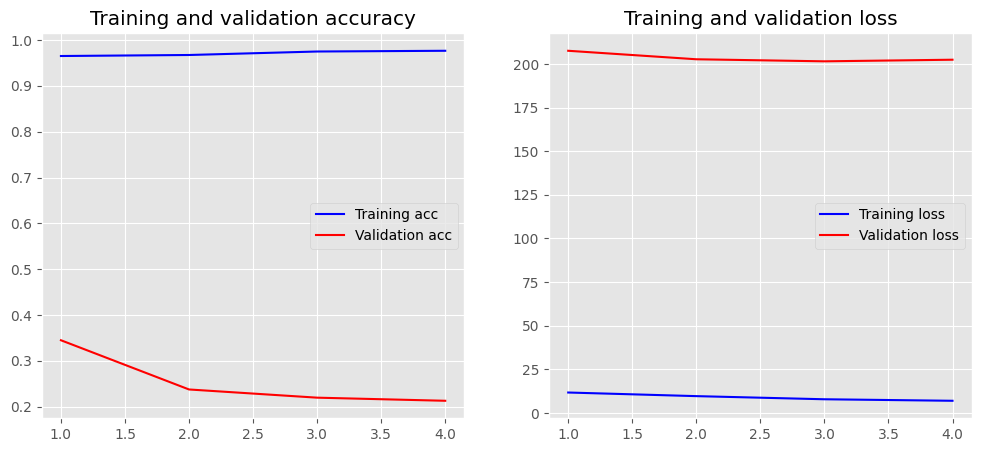

In [25]:
# Plot the graph
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['viterbi_accuracy']
    val_accuracy = history.history['val_viterbi_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(train_hist)

https://www.tensorflow.org/tutorials/keras/save_and_load?hl=th

In [26]:
model.load_weights('/content/gdrive/MyDrive/SuperAI/hack5/model/best_model_crf.hdf5')

In [27]:
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i])
        out.append(out_i)
    return out
test_pred = model.predict(X_test, verbose=1)
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_test)

377/377 [==============================] - 49s 129ms/step


In [28]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_LOC seems not to be NE tag.

  warnings.warn('{} seems not to be NE tag.'.format(chunk))

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_NUM seems not to be NE tag.

  warnings.warn('{} seems not to be NE tag.'.format(chunk))

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_MEA seems not to be NE tag.

  warnings.warn('{} seems not to be NE tag.'.format(chunk))

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: B_DTM seems not to be NE tag.

  warnings.warn('{} seems not to be NE tag.'.format(chunk))

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: I_DTM seems not to be NE tag.

  warnings.warn('{} seems not to be NE tag.'.format(chunk))

/usr/local/lib/python3.10/dist-packages/seqeval/metrics/sequence_

F1-score: 9.0%


## make submission

In [ ]:
with open('/content/gdrive/MyDrive/SuperAI/ss3-hackathon-online-natural-language-processing/ne_test.txt') as f:
    ne_test = f.read().split('\n')

for i in range(len(ne_test)):
    if (ne_test[i] == ''):
        ne_test[i] = '_'

In [29]:
import pandas as pd

test_data = pd.read_csv("/content/gdrive/MyDrive/SuperAI/hack5/nithan-chadok-name-entity-recognition/test.csv")
test_data.shape
test_data

,i,word
0,0,ใน
1,1,สมัย
2,2,หนึ่ง
3,3,_
4,4,พระพุทธเจ้า
...,...,...
65002,65002,ผู้
65003,65003,สำรวม
65004,65004,ดี
65005,65005,แล้ว


In [37]:
submit_test = []
for i in range(len(test_data)):
    w = test_data.loc[i, "word"]
    if w not in word2idx.keys(): # same word idk i think writer did a bag-of-word
        submit_test.append(np.random.choice(range(0, max(list(word2idx.values())))))
    else:
        submit_test.append(word2idx[w])

submit_test[:10]

[31880, 32491, 15885, 31565, 39704, 21405, 36650, 40298, 12230, 31565]

In [38]:
def split_sentence(sentence, maxlen):
    ret = []
    for i in range(0, len(sentence), maxlen):
        try:
            ret.append(sentence[i:i+maxlen])
        except:
            ret.append(sentence[i:])
    return ret

split_test = split_sentence(submit_test, maxlen)
split_test = tf.keras.utils.pad_sequences(maxlen=maxlen, sequences=split_test,
                                          padding="post", value=max(submit_test) - 1)

In [39]:
num_padded = len(split_test.flatten()) - len(submit_test)
num_padded

93

In [40]:
submit_pred = model.predict(split_test, verbose=1)

21/21 [==============================] - 3s 133ms/step


In [35]:
submit_labels = pred2label(submit_pred)
print(len(submit_labels))
submit_labels = np.array(submit_labels).flatten()[:69561]
submit_labels.shape

651


(65100,)

In [44]:
submit_df = pd.DataFrame({'Id': range(0, len(submit_labels)), 'Predicted': submit_labels})
submit_df

,Id,Predicted
0,0,O
1,1,O
2,2,O
3,3,O
4,4,O
...,...,...
65095,65095,O
65096,65096,O
65097,65097,O
65098,65098,O


In [45]:
submit_df = submit_df[0:65007]

In [46]:
submit_df

,Id,Predicted
0,0,O
1,1,O
2,2,O
3,3,O
4,4,O
...,...,...
65002,65002,O
65003,65003,O
65004,65004,O
65005,65005,O


In [49]:
test_tag = pd.read_csv("/content/gdrive/MyDrive/SuperAI/hack5/nithan-chadok-name-entity-recognition/tag_list.csv")

In [51]:
tag2class = {}
for i in range(len(test_tag)):
  tag2class[test_tag.loc[i, "tag"]] = str(test_tag.loc[i, "class"])

In [54]:
tag2class

{'O': '0',
 'B_ORG': '1',
 'B_PER': '2',
 'B_LOC': '3',
 'B_MEA': '4',
 'I_DTM': '5',
 'I_ORG': '6',
 'E_ORG': '7',
 'I_PER': '8',
 'B_TTL': '9',
 'E_PER': '10',
 'B_DES': '11',
 'E_LOC': '12',
 'B_DTM': '13',
 'B_NUM': '14',
 'I_MEA': '15',
 'E_DTM': '16',
 'E_MEA': '17',
 'I_LOC': '18',
 'I_DES': '19',
 'E_DES': '20',
 'I_NUM': '21',
 'E_NUM': '22',
 'B_TRM': '23',
 'B_BRN': '24',
 'I_TRM': '25',
 'E_TRM': '26',
 'I_TTL': '27',
 'I_BRN': '28',
 'E_BRN': '29',
 'E_TTL': '30',
 'B_NAME': '31'}

In [57]:
for i in range(len(submit_df)):
  if(submit_df.loc[i,"Predicted"] in tag2class.keys()):
    submit_df.loc[i,"pred"] = str(tag2class[submit_df.loc[i, "Predicted"]])
  else:
    submit_df.loc[i,"pred"] = str(0)

<ipython-input-57-86d1343db06d>:3: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  submit_df.loc[i,"pred"] = str(tag2class[submit_df.loc[i, "Predicted"]])


In [59]:
submit_df

,Id,Predicted,pred
0,0,O,0
1,1,O,0
2,2,O,0
3,3,O,0
4,4,O,0
...,...,...,...
65002,65002,O,0
65003,65003,O,0
65004,65004,O,0
65005,65005,O,0


In [58]:
submit_df.to_csv("submission_crf_1.csv", index=False)

# Using HoogBERTa-NER-lst20
แถม tokenize ไม่น่าใช้

In [ ]:
!pip install attacut
!pip install transformers



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.5 MB/s eta 0:00:00



  Preparing metadata (setup.py) ... done



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 14.2 MB/s eta 0:00:00

  Preparing metadata (setup.py) ... done








     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.8/473.8 kB 55.9 MB/s eta 0:00:00





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.1 MB/s eta 0:00:00













  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=c1b549b530b8d7f02d3b5845d9dbb2bf10f52c27eff7c6f45b8966b7ec8f05b8

  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac


  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=1d70589350b8df3d9c29457fd0904a59ff32e6604613f24b6ea9f2083aba2cb7

  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95

Successfully built docopt fire









In [ ]:
texts_test_raw = []
f = open(q_path, "r")
file_data = f.readlines()
for line in file_data:
  line = line.strip().replace(u'\xa0', u'') # turn new line -> ''
  texts_test_raw.append(line)

In [ ]:
texts_test_raw = texts_test_raw[:-1]

In [ ]:
#Replace blank with "_"
def blank_space(x):
  if x == '':
    x = '_'
  return x

#Loop replace blank to "_"
for i in range(len(texts_test_raw)):
  texts_test_raw[i] = blank_space(texts_test_raw[i])

In [ ]:
def split_into_sentences(tokens, tokens_per_sentence=20):
    sentences = []
    for i in range(0, len(tokens), tokens_per_sentence):
        sentence = tokens[i:i+tokens_per_sentence]
        sentences.append(sentence)
    return sentences

In [ ]:
my_token = split_into_sentences(texts_test_raw)

In [ ]:
my_token[0]

['นาง',
 'สุดารัตน์',
 '_',
 'เกยุราพันธ์',
 '_',
 'รมว.',
 'สาธารณสุข',
 '_',
 'แถลง',
 'ถึง',
 'การ',
 'จัด',
 'งาน',
 'มหกรรม',
 'กิน',
 'ไก่',
 'ไทย',
 'ปลอด',
 'ภัย',
 '_']

In [ ]:
sent_join = ''.join(my_token[0])

In [ ]:
my_token_list = [] # turn element -> sentence
for i in range(len(my_token)):
  sent_join = ' '.join(my_token[i])
  print(sent_join)
  my_token_list.append(sent_join)

In [ ]:
from transformers import RobertaTokenizerFast, RobertaForTokenClassification
from attacut import tokenize
import torch

tokenizer = RobertaTokenizerFast.from_pretrained("Sirinya/ner-finetuned-lst20")
model = RobertaForTokenClassification.from_pretrained("Sirinya/ner-finetuned-lst20")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 

The secret `HF_TOKEN` does not exist in your Colab secrets.

To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.

You will be able to reuse this secret in all of your notebooks.

Please note that authentication is recommended but still optional to access public models or datasets.

  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.37M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 

The tokenizer class you load from this checkpoint is 'PreTrainedTokenizerFast'. 

The class this function is called from is 'RobertaTokenizerFast'.


config.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/572M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()

  return self.fget.__get__(instance, owner)()


In [ ]:
my_token_list[0]

'นาง สุดารัตน์ _ เกยุราพันธ์ _ รมว. สาธารณสุข _ แถลง ถึง การ จัด งาน มหกรรม กิน ไก่ ไทย ปลอด ภัย _'

test test

In [ ]:
from transformers import pipeline

nlp = pipeline('token-classification', model=model, tokenizer=tokenizer, aggregation_strategy="none")

sentence = "วันที่ 12 มีนาคมนี้ ฉันจะไปเที่ยววัดพระแก้ว ที่กรุงเทพ"
all_sent = []
sentences = sentence.split(" ")
for sent in sentences:
    all_sent.append(" ".join(tokenize(sent)).replace("_","[!und:]"))

sentence = " _ ".join(all_sent)
print(sentence)

print(nlp(sentence))


วัน ที่ _ 12 _ มีนาคม นี้ _ ฉัน จะ ไป เที่ยว วัดพระแก้ว _ ที่ กรุงเทพ

[{'entity': 'B_DTM', 'score': 0.98959374, 'index': 1, 'word': 'วัน</w>', 'start': 0, 'end': 3}, {'entity': 'I_DTM', 'score': 0.9782607, 'index': 2, 'word': 'ที่</w>', 'start': 4, 'end': 7}, {'entity': 'I_DTM', 'score': 0.9975866, 'index': 3, 'word': '_</w>', 'start': 8, 'end': 9}, {'entity': 'I_DTM', 'score': 0.9989825, 'index': 4, 'word': '12</w>', 'start': 10, 'end': 12}, {'entity': 'I_DTM', 'score': 0.9988531, 'index': 5, 'word': '_</w>', 'start': 13, 'end': 14}, {'entity': 'E_DTM', 'score': 0.8283873, 'index': 6, 'word': 'มีนาคม</w>', 'start': 15, 'end': 21}, {'entity': 'E_DTM', 'score': 0.5152182, 'index': 7, 'word': 'นี้</w>', 'start': 22, 'end': 25}, {'entity': 'B_LOC', 'score': 0.97150415, 'index': 13, 'word': 'วัดพระแก้ว</w>', 'start': 45, 'end': 55}, {'entity': 'B_LOC', 'score': 0.93494385, 'index': 16, 'word': 'กรุงเทพ</w>', 'start': 62, 'end': 69}]


In [ ]:
from transformers import pipeline

nlp = pipeline('token-classification', model=model, tokenizer=tokenizer, aggregation_strategy="none")

sentence = my_token_list[0]
print(sentence)
print(nlp(sentence))

pred = nlp(sentence)

for i in pred:
  print(i['word'], i['entity'])

นาง สุดารัตน์ _ เกยุราพันธ์ _ รมว. สาธารณสุข _ แถลง ถึง การ จัด งาน มหกรรม กิน ไก่ ไทย ปลอด ภัย _

[{'entity': 'B_TTL', 'score': 0.99959856, 'index': 1, 'word': 'นาง</w>', 'start': 0, 'end': 3}, {'entity': 'B_PER', 'score': 0.9993511, 'index': 2, 'word': 'สุดารัตน์</w>', 'start': 4, 'end': 13}, {'entity': 'I_PER', 'score': 0.99198794, 'index': 3, 'word': '_</w>', 'start': 14, 'end': 15}, {'entity': 'E_PER', 'score': 0.9737786, 'index': 4, 'word': 'เก', 'start': 16, 'end': 18}, {'entity': 'E_PER', 'score': 0.9690684, 'index': 5, 'word': 'ยุ', 'start': 18, 'end': 20}, {'entity': 'E_PER', 'score': 0.937536, 'index': 6, 'word': 'รา', 'start': 20, 'end': 22}, {'entity': 'E_PER', 'score': 0.96771306, 'index': 7, 'word': 'พันธ์</w>', 'start': 22, 'end': 27}, {'entity': 'B_DES', 'score': 0.9949185, 'index': 9, 'word': 'รมว.</w>', 'start': 30, 'end': 34}, {'entity': 'B_ORG', 'score': 0.9873597, 'index': 10, 'word': 'สาธารณสุข</w>', 'start': 35, 'end': 44}, {'entity': 'B_LOC', 'score': 0.9940350